# Preço de casas em Boston

## Definição do Problema

O conjunto de dados Preço de casas em Boston involve a predição do preço de uma casa em milhares de dolares dado alguns atributos da casa e de sua vizinhança.

É um problema de regressão. Existem 506 observações com 13 features de entrada (atributos da casa e vizinhança) e 1 feature de saída (preço da casa). Os features são os seguintes:

 - CRIM: taxa de criminalidade.
 - ZN: proporção de territorios residenciais divididos em zonas para lotes acima de 25,000 sq.ft.
 - INDUS: proporção de acres de negócios não-varejo.
 - CHAS: Variável fictícia Charles River (= 1 se o limite do setor é rio; 0 caso contrário).
 - NOX: concentração de óxidos nítricos (partes por 10 milhões).
 - RM: número médio de quartos por habitação.
 - IDADE: proporção de unidades ocupadas pelo proprietário construídas antes de 1940.
 - DIS: distâncias ponderadas para cinco centros de emprego em Boston.
 - RAD: índice de acessibilidade às rodovias radiais.
 - IMPOSTO: taxa de imposto sobre propriedades de valor integral por US 10.000.
 - PTRATIO: relação aluno-professor por cidade.
 - B: 1000 (Bk - 0,63) ^ 2 onde Bk é a proporção de negros por cidade.
 - LSTAT: % menor status da população.
 - MEDV: Valor mediano de residências ocupadas pelo proprietário em US 1.000.

### Importação das bibliotecas

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn import metrics
from sklearn import ensemble
from sklearn import svm
from sklearn import tree
from sklearn import neighbors
from sklearn import model_selection 
from sklearn.preprocessing import StandardScaler,Normalizer
import seaborn as sns

### Carregando o dataset

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)
print(boston.target.shape)

(506, 13)
(506,)


### Visualização e descrição dos dados

In [3]:
X = boston.data
y = boston.target

In [4]:
data = pd.DataFrame(X, columns=boston.feature_names)
data['PRICE'] = y
data.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [5]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


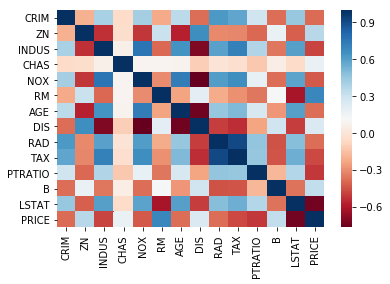

In [6]:
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            cmap='RdBu')

In [7]:
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


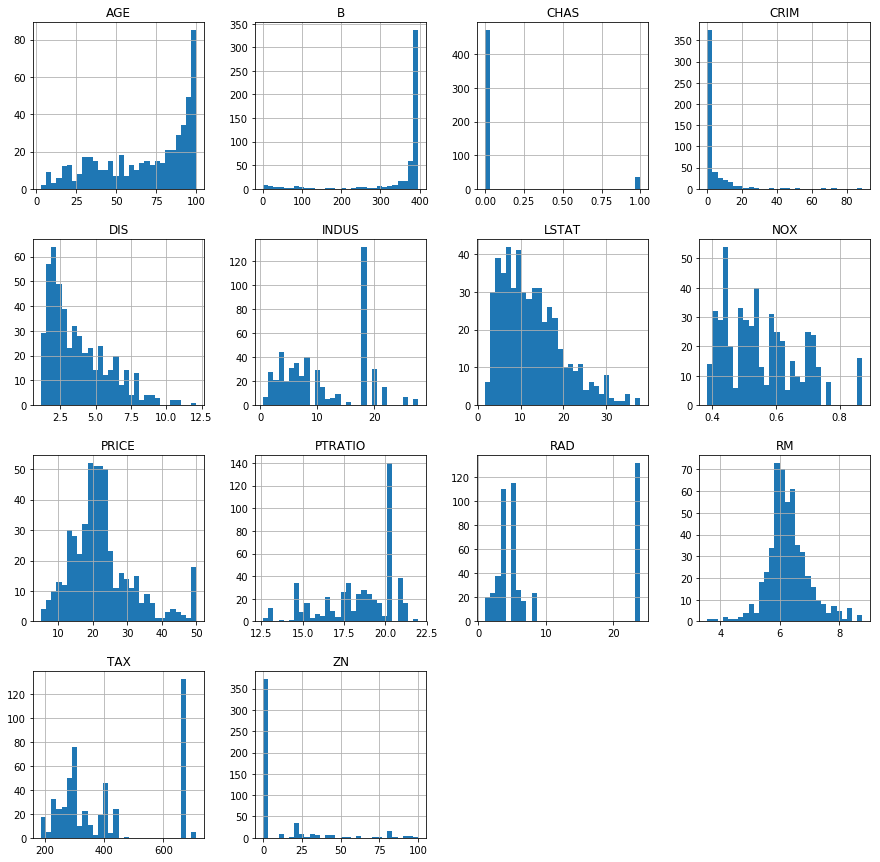

In [8]:
data.hist(figsize=(15,15), bins=30);

### Criação do dataset de validação 

In [9]:
kfold = model_selection.KFold(n_splits=3, shuffle=True, random_state=12)

### Criação dos modelos

#### Classificadores utilizados:

- Linear Regression
- Linear SVR
- SVR - Epsilon-Support Vector Regression
- Random Forest Regressor
- Gradient Boosting Regressor
- Extra Tree Regressor
- KNN
- SGDC

In [10]:
resultados = {}
resultados['LR'] = { 'model': linear_model.LinearRegression() }
resultados['LSVR'] = { 'model': svm.LinearSVR() }
resultados['SVR'] = { 'model': svm.SVR(kernel='linear') }
resultados['RFR'] = { 'model': ensemble.RandomForestRegressor() }
resultados['GBR'] = {'model': ensemble.GradientBoostingRegressor()}
resultados['ETR'] = {'model': tree.ExtraTreeRegressor()}
resultados['KNN'] = {'model': neighbors.KNeighborsRegressor()}
resultados['SGDC'] = {'model': linear_model.SGDRegressor(max_iter=1000)}

In [11]:
for key in resultados:
    print('processando {}...'.format(key))
    resultados[key]['mses'] = []
    resultados[key]['maes'] = []
    for idx_train, idx_test in kfold.split(X, y):
        X_train, y_train = X[idx_train], y[idx_train]
        X_test, y_test = X[idx_test], y[idx_test]
        resultados[key]['model'].fit(X_train, y_train)
        resultados[key]['y_pred'] = resultados[key]['model'].predict(X_test)
        resultados[key]['mses'].append(metrics.mean_squared_error(y_test, resultados[key]['y_pred']))
        resultados[key]['maes'].append(metrics.mean_absolute_error(y_test, resultados[key]['y_pred']))
    resultados[key]['mse'] = np.mean(resultados[key]['mses'])
    resultados[key]['rmse'] = np.sqrt(resultados[key]['mse'])
    resultados[key]['mae'] = np.mean(resultados[key]['maes'])

processando LR...
processando LSVR...
processando SVR...


/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


processando RFR...
processando GBR...
processando ETR...
processando KNN...
processando SGDC...


In [12]:
df = pd.DataFrame(resultados)
df.T[['mse','rmse','mae']]

,mse,rmse,mae
ETR,25.3023,5.03014,3.23156
GBR,10.4438,3.23169,2.18813
KNN,44.4589,6.66775,4.56963
LR,23.7917,4.87768,3.45312
LSVR,34.5524,5.87812,4.0903
RFR,14.0414,3.74719,2.45822
SGDC,1.35834e+28,1.16548e+14,9.06759e+13
SVR,25.6072,5.06036,3.2717


In [13]:
df_T = df.transpose()
df_T = df_T[ ['rmse','mae'] ]
df_T

,rmse,mae
ETR,5.03014,3.23156
GBR,3.23169,2.18813
KNN,6.66775,4.56963
LR,4.87768,3.45312
LSVR,5.87812,4.0903
RFR,3.74719,2.45822
SGDC,1.16548e+14,9.06759e+13
SVR,5.06036,3.2717


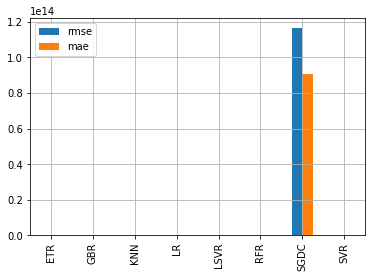

In [14]:
df_T.plot(kind='bar', grid=True);

In [15]:
norm = Normalizer()
std = StandardScaler()
for key in resultados:
    print('processando {}...'.format(key))
    resultados[key]['mses_norm'] = []
    resultados[key]['maes_norm'] = []
    resultados[key]['mses_std'] = []
    resultados[key]['maes_std'] = []
    for idx_train, idx_test in kfold.split(X, y):
        X_train, y_train = X[idx_train], y[idx_train]
        X_test, y_test = X[idx_test], y[idx_test]
        X_train_std = std.fit_transform(X_train)
        X_train_norm = norm.fit_transform(X_train)
        X_test_norm = norm.transform(X_test)
        X_test_std = std.transform(X_test)
        resultados[key]['model'].fit(X_train_norm, y_train)
        resultados[key]['y_pred_norm'] = resultados[key]['model'].predict(X_test_norm)
        resultados[key]['mses_norm'].append(metrics.mean_squared_error(y_test, resultados[key]['y_pred_norm']))
        resultados[key]['maes_norm'].append(metrics.mean_absolute_error(y_test, resultados[key]['y_pred_norm']))
        resultados[key]['model'].fit(X_train_std, y_train)
        resultados[key]['y_pred_std'] = resultados[key]['model'].predict(X_test_std)
        resultados[key]['mses_std'].append(metrics.mean_squared_error(y_test, resultados[key]['y_pred_std']))
        resultados[key]['maes_std'].append(metrics.mean_absolute_error(y_test, resultados[key]['y_pred_std']))      
    resultados[key]['mse_norm'] = np.mean(resultados[key]['mses_norm'])
    resultados[key]['rmse_norm'] = np.sqrt(resultados[key]['mse_norm'])
    resultados[key]['mae_norm'] = np.mean(resultados[key]['maes_norm'])
    resultados[key]['mse_std'] = np.mean(resultados[key]['mses_std'])
    resultados[key]['rmse_std'] = np.sqrt(resultados[key]['mse_std'])
    resultados[key]['mae_std'] = np.mean(resultados[key]['maes_std'])

processando LR...
processando LSVR...
processando SVR...
processando RFR...
processando GBR...
processando ETR...
processando KNN...
processando SGDC...


In [16]:
df = pd.DataFrame(resultados)
df.T[['rmse_norm','mae_norm','rmse_std','mae_std']]

,rmse_norm,mae_norm,rmse_std,mae_std
ETR,5.39427,3.52803,5.01429,3.37717
GBR,3.65853,2.49119,3.2515,2.19984
KNN,6.45492,4.42018,4.71963,2.93595
LR,4.84412,3.30609,4.87768,3.45312
LSVR,8.34838,5.51029,5.09492,3.25007
RFR,4.09915,2.69489,3.59894,2.39756
SGDC,7.80573,5.58316,4.87749,3.45184
SVR,8.26533,5.44993,5.06413,3.23696


In [17]:
df_T = df.transpose()
df_T = df_T[ ['rmse_norm','mae_norm','rmse_std','mae_std'] ]
df_T

,rmse_norm,mae_norm,rmse_std,mae_std
ETR,5.39427,3.52803,5.01429,3.37717
GBR,3.65853,2.49119,3.2515,2.19984
KNN,6.45492,4.42018,4.71963,2.93595
LR,4.84412,3.30609,4.87768,3.45312
LSVR,8.34838,5.51029,5.09492,3.25007
RFR,4.09915,2.69489,3.59894,2.39756
SGDC,7.80573,5.58316,4.87749,3.45184
SVR,8.26533,5.44993,5.06413,3.23696


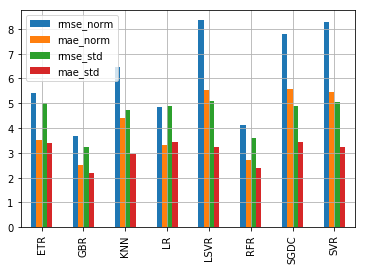

In [18]:
df_T.plot(kind='bar', grid=True);

In [19]:
modelofinal = linear_model.LinearRegression()
std = StandardScaler()
X_std = std.fit_transform(X)
modelofinal.fit(X_std,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
dtf = pd.DataFrame()
dtf['y_test'] = y_test
dtf['y_pred'] = resultados['LR']['y_pred']
dtf

,y_test,y_pred
0,34.7,30.573489
1,18.9,19.575346
2,17.5,16.710564
3,13.6,12.435594
4,13.9,13.516272
5,14.8,14.726920
6,18.4,19.274210
7,20.0,20.516701
8,19.4,17.371303
9,18.9,14.907229
